# Synthetic Data Fit

In [1]:
from drdmannturb.calibration import CalibrationProblem
from drdmannturb.data_generator import OnePointSpectraDataGenerator
from drdmannturb.shared.parameters import NNParameters, ProblemParameters, LossParameters, PhysicalParameters

import torch
import torch.nn as nn
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu" 

# v2: torch.set_default_device('cuda:0')
if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")

L = 0.59

Gamma = 3.9
sigma = 3.4

domain = torch.logspace(-1, 2, 20)

In [2]:
pb = CalibrationProblem(
    nn_params = NNParameters(
        activations = [nn.GELU(), nn.GELU()], 
    ),
    prob_params = ProblemParameters(nepochs=5),
    loss_params = LossParameters(),
    phys_params = PhysicalParameters(
        L=L,
        Gamma=Gamma,
        sigma=sigma,
        domain=domain
    ), 
    device=device
)

/home/ai/miniconda3/envs/fracturbulence/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
parameters = pb.parameters
parameters[:3] = [
    np.log(L),
    np.log(Gamma),
    np.log(sigma)
]

pb.parameters = parameters[:len(pb.parameters)]

k1_data_pts = domain
DataPoints = [(k1, 1) for k1 in k1_data_pts]

In [4]:
Data = OnePointSpectraDataGenerator(data_points=DataPoints).Data

In [5]:
pb.eval(k1_data_pts)
pb.calibrate(data=Data)


Calibrating MannNet...
torch.Size([80])
Initial loss:  0.12366054938191283

[Calibration.py -- calibrate]-> Epoch 0

loss  =  0.12366054938191283
loss  =  0.0759374543756626
loss  =  0.06869596224798634
loss  =  0.06285403181287523
loss  =  0.05811932318400309
loss  =  0.05428185266500753
loss  =  0.051171438548810635
loss  =  0.048650141380410114
loss  =  0.04660620373931759
loss  =  0.04494905976782894
loss  =  0.043605307481686416
loss  =  0.04251550063729656
loss  =  0.03788765096293903
loss  =  0.03788647304955605
loss  =  0.03788128542568847
loss  =  0.03783708549918602
loss  =  0.03783000492494152
loss  =  0.037787891540332005
loss  =  0.03778269590673502
loss  =  0.03774286955133968
loss  =  0.037722179385580104
loss  =  0.03764088328382248
loss  =  0.037590807930348136
loss  =  0.03737235206086578
loss  =  0.03734472811940768
---------------------------------



[Calibration.py -- calibrate]-> Epoch 1

loss  =  0.03734472811940768
loss  =  0.03729058228225048
loss  =  0.03707

array([-0.50459637,  0.27367878,  0.96829735,  0.66069455,  0.5608757 ,
        0.33819312,  0.73277577,  0.2954907 , -0.32051102,  0.17860301,
       -0.56035611, -0.47903533, -0.57219267, -0.11689931, -0.12607475,
        0.1791655 , -0.27680964, -0.18542137,  0.04996022,  0.24089362,
        1.34898306,  0.24462987,  0.77099694, -0.57261657,  0.59346421,
        0.24361849, -0.35190726,  0.65409698,  0.41661184,  0.31053371,
        0.29704484,  0.595771  ,  0.51563769,  0.27363157,  0.08015937,
       -0.04729618, -0.01628368,  0.50491843,  0.4923508 , -0.00820176,
        0.19018015, -0.14948571,  0.23548589,  0.52279167,  0.60035404,
        0.26431555,  0.02834357, -0.2266405 , -0.07560591, -0.17133193,
        0.47463254,  0.23365664, -0.17554146, -0.17486922,  0.33493138,
       -0.18905829, -0.29784244,  0.20244696,  0.10233972, -0.39356766,
       -0.14454539,  0.29991147, -0.01186969, -0.20032501, -0.17000368,
       -0.24824084,  0.24059769, -0.30287304, -0.37543133,  0.09

k1.size: torch.Size([20])   self.kF_data_vals: torch.Size([80])


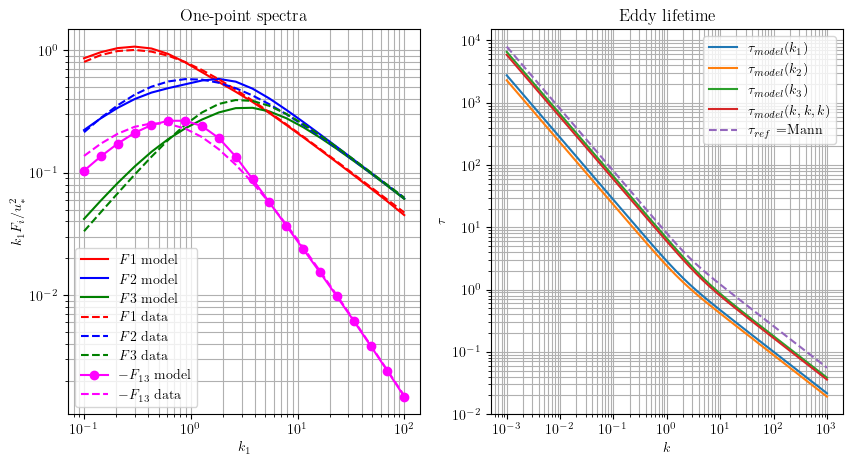

In [6]:
pb.plot(plt_dynamic=False)

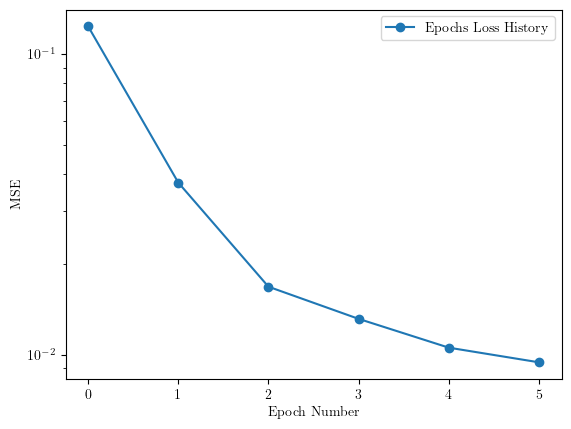

In [7]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot( pb.loss_history_epochs, 'o-', label="Epochs Loss History")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.yscale('log')

plt.show()
